In [1]:
import gdsfactory as gf

# Create circuit
c = gf.Component()

# Add components
gc = c << gf.get_component('grating_coupler_elliptical')
mzi_device = c << gf.get_component('mzi')

# Position and rotate components
gc.rotate(180).move((-50, 0))
mzi_device.move((0, 0))

# Route components
route = gf.routing.route_single(
    c,
    port1=gc.ports["o1"],
    port2=mzi_device.ports["o1"],
    cross_section="strip",
    start_straight_length=0
)

# Add ports
c.add_port("in0", port=gc.ports["o1"])
c.add_port("out0", port=mzi_device.ports["o2"])



Port(name: out0, dwidth: 0.5, trans: r0 *1 81.1,0, layer: WG (1/0), port_type: optical)

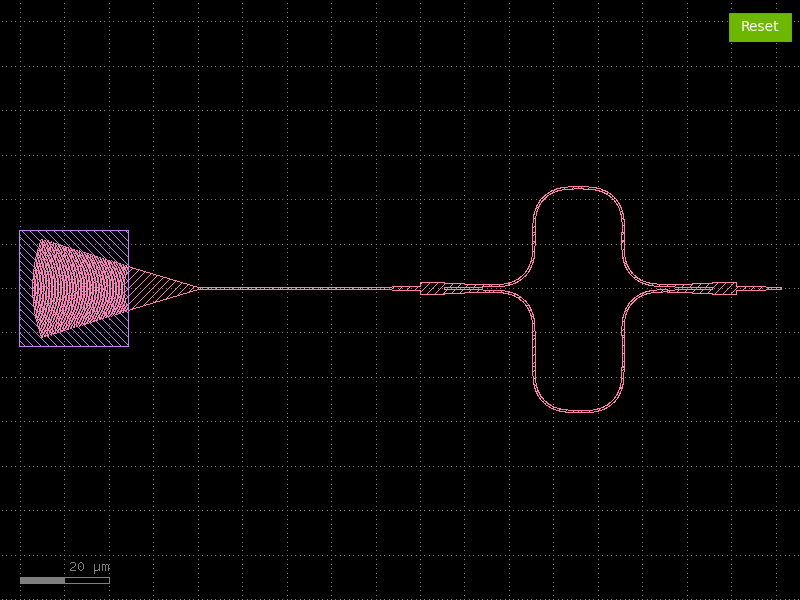

In [2]:
%matplotlib widget

import iklayout

path = c.write_gds().absolute()

iklayout.show(path)


